# Wave divisor function: $\sigma_{0}(x)$

The integer divisor function can be described as a summation of repeating waves. Each wave filters out numbers. Divisor wave $\mathbb{X}=7$ wil filter: 7, 14, 21, 28, 35 etc. The divisor function can bescribed as:

$$\large \sigma_{0}(x)=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right)$$

N should be a positive even integer, only then positive pulses occur. If $N\rightarrow\infty$ discrete pulses occur on the intervals determined by: $\mathbb{X}$. This definition of the divisor function does not take 1 in account, for the conventional definition 1 should be added to the wave divisor function.

With help of Euler’s formula and the binomial theorem the function can be rewritten as:

$$\large \sigma_{0}(x)=\sum_{\mathbb{X}=2}^{\infty}e^{i\left( \frac{N\pi}{\mathbb{X}}x \right)} 2^{(-N)} \sum_{k=0}^{N} \binom{N}{k} e^{-i\left( \frac{\pi}{\mathbb{X}}x \right)}  $$

The solution for the divisor function occurs when the angular component is 0 only then pulses of magnitude 1 occur. For the divisor function we can set: $e^{i\left( \frac{N\pi}{\mathbb{X}}x \right)}=1$. So the "Wave Divisor Function" becomes:

$$\large \sigma_{0}(x)=\sum_{\mathbb{X}=2}^{\infty} 2^{(-N)} \sum_{k=0}^{N} \binom{N}{k} e^{-i\left( \frac{\pi}{\mathbb{X}}x \right)}  $$

The n choose k notation can be writen in a trigiometric formulation.

$$\large \Re(\sigma_{0})=\sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

$$\large \Im(\sigma_{0})=-i \sum_{\mathbb{X}=2}^{\infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \sin \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

This is only valid with the following criteria:

$$\large \cos^{2} \left( \frac{N\pi}{\mathbb{X}}x  \right) + \sin^{2} \left( \frac{N\pi}{\mathbb{X}}x  \right)=1$$

Thus the solution of the divisor function is only valid for integer values of $x$. The wave divisor function consists of repeating wave packages with different different frequencies. The wave divisor function will have an error. It appears that the error is dependant upon the pulse width. N determines the pulse width of the individual wave packages.

More information: [pdf Google Drive][1]

[1]: https://drive.google.com/open?id=10p06BBJtKVcreHfzzbF--a47fR_lbW_h

# N the pulse width definition.

The wave divisor function consists of repeating wave packages. The width of a wave package can be described as the pulse height $L$ at $\Delta x$:

$$\large \cos^{N} \left( \frac{\pi}{\mathbb{X}} \Delta x \right)=L$$

So N can be calculated, we can determine $N(\mathbb{X})$ for every divisor wave. Note that N sould be an even number else negative pulses can occur. Note that the rounding to it's closest even number has a randomizing effect.

$$\large N(\mathbb{X})= \frac{\log (L)}{\log \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)\right)} \space, \space \space N \in 2 \mathbb{N} $$

For $(\mathbb{X} \rightarrow \infty)$ N can be approximated as:

$$\large N(\mathbb{X}) \approx \lim_{\mathbb{X} \rightarrow \infty}     \frac{\log(L)}{\log \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)      \right)} = - \frac{2 \mathbb{X}^2 \log(L)}{\pi^2 \Delta x^2} $$

More information: [pdf Google Drive][1], [Wolfram Alpha][2].

[1]: https://drive.google.com/open?id=10p06BBJtKVcreHfzzbF--a47fR_lbW_h
[2]: https://www.wolframalpha.com/input/?i=ln%28L%29%2F%28ln%28cos%28pi*delta%2FX%29%29%29+as+X-%3Einfinity

# Simulation of Wave Divisor Function.

Below is a simulation of the wave divisor function. The real solution of the divisor count is displayed for the number $x=1 \space to \space  x=100$. The number of divisor waves can be selected and the pulse width can be set $L, \space \Delta x$. With small pulse width like: $\Delta x=0.25, \space L=0.5$ individual wave packages are identified for every number (zoom in).

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
import matplotlib.pyplot as plt5

import numpy as np

from operator import add
from operator import sub
from operator import mul
from operator import truediv

from IPython.display import display

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


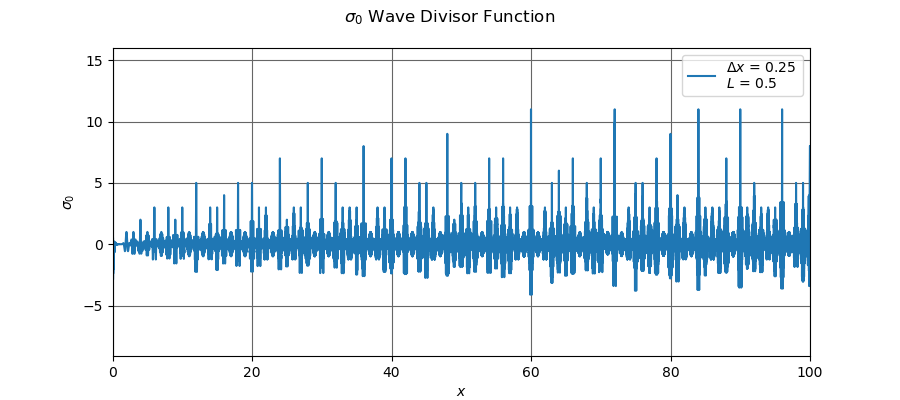

Options:
L is pulse height at dx
Select number of divisors waves (use: <Ctrl> or <Alt> to select multiples.)


interactive(children=(FloatSlider(value=0.25, description='$\\Delta x$:', max=0.99, min=0.15, step=0.01), Floa…

In [3]:
x1 = np.linspace(0, 100, 40001)
fig, ax1 = plt1.subplots(1, figsize=(9, 4))
plt1.suptitle('$\sigma_{0}$ Wave Divisor Function')

def update_plot(dx, L, wave):
    
    ax1.clear()
    
    #Set zero list
    y=[0]*40001
    
    #Calc Re divisor solution for all selected divisor waves
    for w in wave:
        N=-2*(w**2)*np.log(L)/((np.pi**2)*(dx**2))
        N=2*round(0.5*N,0)
        yw = ((np.cos(x1*np.pi/w))**N)*(np.cos(np.pi*N*x1/w))
        y=list(map(add, y, yw) )
    
    #Determine scaling for y axis (x=0 is excluded)
    countMax=max(y[int(40001*(2)/100):40001])
    countMin=min(y[int(40001*(2)/100):40001])
    
    units = '$\Delta x$ = {} \n$L$ = {}'
    
    #update graph
    ax1.plot(x1, y, label=units.format(dx, L))
    ax1.axis([0, 100, countMin-5,countMax+5])
    ax1.legend(loc=1)
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$\sigma_{0}$')
    ax1.grid(b=True, which='major', color='#666666', linestyle='-')
    plt1.show()

print("Options:")
print("L is pulse height at dx")
print("Select number of divisors waves (use: <Ctrl> or <Alt> to select multiples.)")

dx = widgets.FloatSlider(min=0.15, max=0.99, value=0.25, step=0.01, description='$\Delta x$:')
L = widgets.FloatSlider(min=0.15, max=0.99, value=0.5, step=0.01, description='$L$:')
wave = widgets.SelectMultiple(options=list(range(2,101)), value=list(range(2,101)), description="$\mathbb{X}$:")   

widgets.interactive(update_plot, dx=dx, L=L, wave=wave)

# Oribitals of numbers.


Every number can be seen as a path in the $\Re, \space \Im$ plane. Prime numbers will only have one frequency. Numbers with more divisors will have an unique resonation. When the pulse width is small enough like: $\Delta x=0.25, \space L=0.5$ the effect of neigbour pulses is neglactable and the resonance curve can be displayed. The Orbital is displayed between: $(x-0.5)\le x \le (x+0.5)$. The black dot indicates the divisor count.

<IPython.core.display.Javascript object>


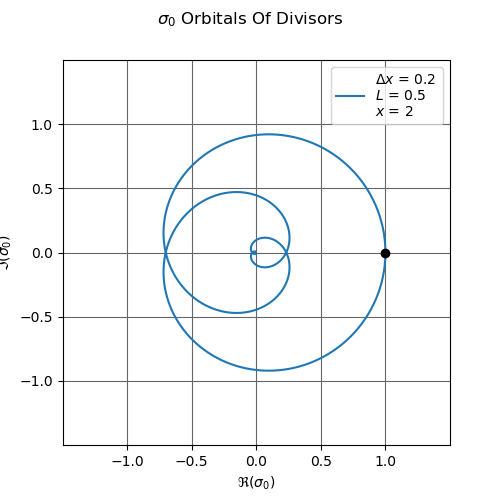

Options:
L is pulse height at dx.
Select x to display orbital.


interactive(children=(Dropdown(description='$\\Delta x$:', index=2, options=(0.1, 0.15, 0.2, 0.25, 0.3, 0.35, …

In [4]:
x2 = np.linspace(0, 101, 200002)
fig, ax2= plt2.subplots(1, figsize=(5, 5))
plt2.suptitle('$\sigma_{0}$ Orbitals Of Divisors')

def update_plot(dx2, L2, sx):
    
    #Set x range (x-0.5)<x<(x+0.5)
    xf=x2[int(200002*(sx-0.5)/101):int(200002*(sx+0.5)/101)]
    
    ax2.clear()
    
    reD=[0]*200002
    imD=[0]*200002
    
    #Create list with waves X=2 to X=100
    wave2=list(range(2,101))
    
    for w2 in wave2:
  
        N2=-2*(w2**2)*np.log(L2)/((np.pi**2)*(dx2**2))
        N2=2*round(0.5*N2,0)
        
        reDw = ((np.cos(xf*np.pi/w2))**N2)*(np.cos(np.pi*N2*xf/w2))
        imDw = (-(np.cos(xf*np.pi/w2))**N2)*(np.sin(np.pi*N2*xf/w2))
        
        reD=list(map(add, reD, reDw))
        imD=list(map(add, imD, imDw))
        
    units2 = '$\Delta x$ = {} \n$L$ = {} \n$x$ = {}'
    
    countD=max(reD)
 
    ax2.plot(reD, imD, label=units2.format(dx2, L2, sx))
    ax2.legend(loc=1)
    ax2.set_xlabel('$\Re (\sigma_{0})$')
    ax2.set_ylabel('$\Im (\sigma_{0})$')
    ax2.axis([-(countD+0.5), (countD+0.5), -(countD+0.5),(countD+0.5)])
    ax2.plot([countD],[0], color='black', marker='o')
    ax2.grid(b=True, which='major', color='#666666', linestyle='-')
    plt2.show()

print("Options:")
print("L is pulse height at dx.")
print("Select x to display orbital.")

dx2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.2, description='$\Delta x$:')  
L2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:') 
sx = widgets.Dropdown(options=list(range(2,101)), description='$x$:')   

widgets.interactive(update_plot, dx2=dx2, L2=L2, sx=sx)



# Wavepulse outline.

The $\cos^N$ determines the outline of the wave pulses. The outline reaches a limit when $\mathbb{X} \rightarrow \infty$. Here the divisorwave only exists arround the origin $x=0$ the frequency then is zero. The outline $O(x)$ is defined as:

$$\large O(x)=\lim_{\mathbb{X} \rightarrow \infty}\cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right)=exp \left( \frac{\log(L) \space}{\Delta x^{2}} x^{2}  \right)$$

The outline will always be an positive number. The other component of the wave divisor function is the high frequency part: $HF(x)$. This can be either positive or negative. Thus error in $\sigma_{0}(x)$ will also be positive or negative.:

$$\large HF(\mathbb{X})= \cos \left( \frac{N\pi}{\mathbb{X}} \space x \right)$$

Below an example of the Wavepulse width. Note that $N(\mathbb{X})$ should be an even integer (only then positive pulses). Though arround the origin $N(\mathbb{X})$ can be seen continuous there $\cos^{N}$ is always positive. The randomizing effect of rounding $N(\mathbb{X})$ to it's closest even number can also be observed.

More information:
[pdf Google Drive][1], 
[Wofram Alpha][2]

[1]: https://drive.google.com/open?id=10p06BBJtKVcreHfzzbF--a47fR_lbW_h
[2]: https://www.wolframalpha.com/input/?i=limit+ln(L)*ln(cos(m*pi/X))/ln(cos(pi*Delta/X))+as+X-%3Einfinity


<IPython.core.display.Javascript object>


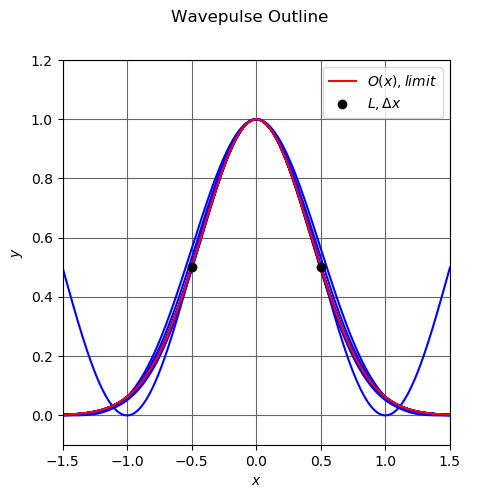

Options:
L is pulse height at dx.
Select Waves X.


interactive(children=(FloatSlider(value=0.5, description='$\\Delta x$:', max=0.99, min=0.15, step=0.01), Float…

In [5]:
x3 = np.linspace(-1.5, 1.5, 251)
fig, ax3= plt3.subplots(1, figsize=(5, 5))
plt3.suptitle('Wavepulse Outline')

def update_plot(dx3, L3, divX, Ntyp):
 
    ax3.clear()
    
    for w3 in divX:
  
        #N3=-2*(w3**2)*np.log(L3)/((np.pi**2)*(dx3**2))
        N3=(np.log(L3))/(np.log(np.cos(np.pi*dx3/w3)))

        if Ntyp=="Even":
            N3=2*round(0.5*N3,0)

        y3 =((np.cos(x3*np.pi/w3))**N3)
        ax3.plot(x3, y3, color='b', linestyle='-')

    #Plot wavepulse outline
    ylimit=np.exp(np.log(L3)*(x3**2)/(dx3**2))
    ax3.plot(x3, ylimit, label='$O(x), limit$', color='r', linestyle='-')
    ax3.plot(dx3,L3, color='black', marker='o', linestyle='', label='$L, \Delta x$')
    ax3.plot(-dx3,L3, color='black', marker='o')
    
    ax3.legend(loc=1)
    ax3.set_xlabel('$x$')
    ax3.set_ylabel('$y$')
    ax3.axis([-1.5, 1.5, -0.1, 1.2])
    ax3.grid(b=True, which='major', color='#666666', linestyle='-')
    plt3.show()

print("Options:")
print("L is pulse height at dx.")
print("Select Waves X.")

Ntyp =widgets.Dropdown(options=["Even", "Continuo"], value="Even", description='$N$:')
dx3 = widgets.FloatSlider(min=0.15, max=0.99, value=0.5, step=0.01, description='$\Delta x$:')
L3 = widgets.FloatSlider(min=0.15, max=0.99, value=0.5, step=0.01, description='$L$:')
divX = widgets.SelectMultiple(options=list(range(2,21)), value=list(range(2,21)), description="$\mathbb{X}$:")  

widgets.interactive(update_plot, dx3=dx3, L3=L3, divX=divX, Ntyp=Ntyp)

# Error of the Wave Divisor Function.

The error of the wave divisor function is majorly determined by neighbour pulses like: $\sigma(x-1)$ and $\sigma(x+1)$. The maximum error from a direct neighbour can be determined by the wavepulse outline: 

$$\large max(\epsilon)=exp \left( \frac{\log(L)}{\Delta x^2}      \right)$$

The high frequency component $HF(\mathbb{X})$ scales linear with $\mathbb{X}$ (see link for more information). This linear dependance will result in a arcsine distribution only if the divisors at $\sigma(x-1)$ and $\sigma(x+1)$ are random distributed, which is supposed true for large numbers. Note that $N(\mathbb{X})$ also is a randomizing factor while it's rounded to it's closest even number. 

$$\large HF(\mathbb{X})= \cos \left( \frac{N\pi}{\mathbb{X}} \right) \approx \cos (\alpha \mathbb{X})$$

$$\large \alpha = - \frac{2 \space \log(L)}{\pi \space \Delta x^{2}}$$

The statistical variation of the arcsine distribution is determined as:

$$\large Var(\mathbb{X})=\frac{1}{2} \cdot \space max^{2}(\epsilon)$$

It appears that the error follows a random walk over an arcsine distribution. The total number of neighbour divisors determine the total variation. Error caused by $\sigma(x-m)$ and $\sigma(x+m)$ also contribute to the error. Though, it is found that the total error converges to direct neighbour divisors/pulses (see link with more information).The variation in $\sigma_{0}(x)$ then is derived as:

$$\large Var(\sigma_{0})= \frac{1}{2} \cdot \space max^{2}(\epsilon) \cdot (\sigma_{0}(x-1)+\sigma_{0}(x+1)) $$

$$\large Var(\sigma_{0}) \approx  max^{2}(\epsilon) \cdot \sigma_{0}(x) $$


The divisor growth is defined as (Dirichlet):

$$\large D(x) \approx \log(x) + 2 \gamma -1 -(1)$$

The error is proportional to the divisor count and the divisor count is proportional to: $\sim log(x)$ for large numbers. The standard deviation in the wave divisor function than is proportional to:

$$\large Stdev(\sigma_{0}) \approx max(\epsilon) \cdot \sqrt{\log(x)-0.84558}$$

Note that an extra $(-1)$ is added the wave divisor function is excluding divisor: 1.


More information: [pdf Google Drive][1], [Wolfram Alpha][2], [Openturns Github][3], [Wolfram Divisor Function][4]

[1]: https://drive.google.com/open?id=10p06BBJtKVcreHfzzbF--a47fR_lbW_h
[2]: https://www.wolframalpha.com/input/?i=pi*ln(L)/(X^2*ln(cos(pi*delta/X)))+as+X-%3Einfinity
[3]: http://openturns.github.io/openturns/1.9/user_manual/_generated/openturns.Arcsine.html
[4]: http://mathworld.wolfram.com/DivisorFunction.html

# Error simulation.

The error in the divisor function can be calculated by substracting the wave divisor function from the real divisor count:

$$\Large \epsilon (x) = \sigma_{0}(x)_{Wave} - \sigma_{0}(x)_{Discrete}$$

The error is calculated while: $L$, $\Delta x$ and the number range can be given. Optionally the $3 Stdev_{\sigma_{0}}(x)$ lines can be included determining 99.7% of the error. For small: $L$, $\Delta x$ the error will result in <0>, the error is then to small to be calculated.

<IPython.core.display.Javascript object>


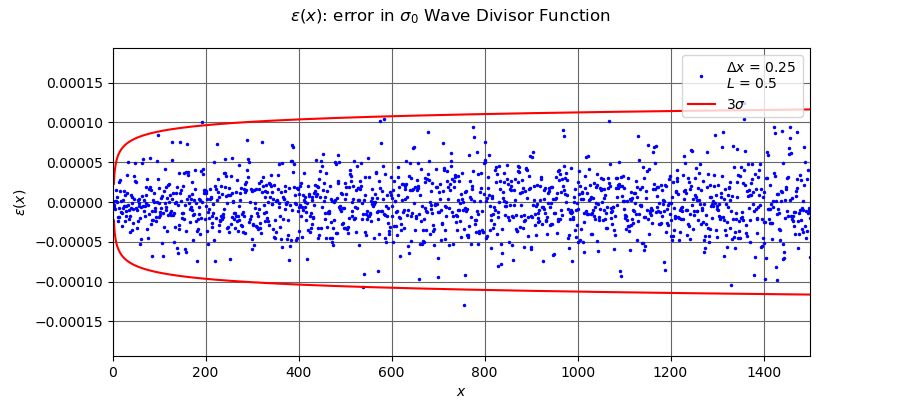

Options:
L is pulse height at dx
Select number of divisors waves.


interactive(children=(Dropdown(description='$\\Delta x$:', index=3, options=(0.1, 0.15, 0.2, 0.25, 0.3, 0.35, …

In [6]:
"""
The error in the divisor count is determined.
The discrete divisor count is calculated (modules). And the wave divisor count is calculated.
Numbers 0 and 1 are not included in the divisor count.
"""

from ipywidgets import IntProgress

fig, ax4 = plt4.subplots(1, figsize=(9, 4))
plt4.suptitle('$\epsilon(x)$: error in $\sigma_{0}$ Wave Divisor Function')

def update_plot(dx4, L4, max4,Typ):

    #Instantiate progress bar
    f = IntProgress(min=0, max=3*max4, description="")
    display(f)

    #Clear Graph
    ax4.clear()
    
    #Discrete divisor count variables
    #xD = np.linspace(2,max4,max4-1)
    yD=[]
    yDD=[0]*(max4+1)

    #Wave divisor function variables
    x4 = np.linspace(2,max4,max4-1)
    y4=[0]*(max4-1)
    
    #loop trought all values between 2 and maximum    
    for w4 in range(2,max4):    

        #Determine Discrete Divisor Count
        for i in range(2,max4+1):
            if (i%w4)==0:
                yD.append(1)
            else:
                yD.append(0)
        
        #Update progressbar.
        if w4%50==0:
            f.value += 50*(3*0.9)
            
        yDD=list(map(add, yDD, yD))
        yD=[]
        
        #Determine Wave Divisor Count.
        N4=-2*(w4**2)*np.log(L4)/((np.pi**2)*(dx4**2))
        N4=2*round(0.5*N4,0)
        
        yw4 = ((np.cos(x4*np.pi/(w4)))**N4)*(np.cos(np.pi*N4*x4/(w4)))
        y4=list(map(add, y4, yw4))

    #Determine the error [Wave]-[Discrete]
    err=[] 
    err=list(map(sub, y4, yDD))
    f.value += max4/10
    
    #Growth Plot Sqrt(ln(x))
    if Typ=="On":
        xG = np.linspace(3,max4,max4-1)
        em=np.exp(np.log(L4)/(dx4**2))
        yGpos=np.sqrt(np.log(xG)-0.84558)*em*3
        yGneg=-np.sqrt(np.log(xG)-0.84558)*em*3
    
    #Determine maximum error.
    merr=max([max(err),abs(min(err))])

    #Plot error update graph
    units4 = '$\Delta x$ = {} \n$L$ = {}'
    ax4.plot(x4, err, color='blue', marker='.', markersize=3 ,linestyle='' ,label=units4.format(dx4, L4))

    #Plot error growth
    unitse = '$3 \sigma$'
    
    if Typ=="On":
        ax4.plot(xG, yGpos, color='red', linestyle='-' ,label=unitse)
        ax4.plot(xG, yGneg, color='red', linestyle='-' )
    
    #Set scaling and exis
    ax4.axis([0, max4, -(merr+0.5*merr) , (merr+0.5*merr) ])
    ax4.legend(loc=1)
    ax4.set_xlabel('$x$')
    ax4.set_ylabel('$\epsilon(x)$')
    ax4.grid(b=True, which='major', color='#666666', linestyle='-')
    plt4.show()
 
    f.value += max4/10
    f.close()

print("Options:")
print("L is pulse height at dx")
print("Select number of divisors waves.")

dx4 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.25, description='$\Delta x$:')  
L4 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:') 
max4 = widgets.Dropdown(options=list(range(500,10500,500)), value=1500, description='$Range$:') 
Typ =widgets.Dropdown(options=["None", "On"], value="On", description='$3 \sigma$:')

widgets.interactive(update_plot, dx4=dx4, L4=L4, max4=max4, Typ=Typ)

# Higher Order Wave Divisor  Function: $\sigma_{m}(x)$

The wave divisor function can also be expressed to determine higher order solutions $\sigma_{m}(x)$. The n choose k notation will look like:

$$\large \sigma_{m}(x)=\sum_{\mathbb{X}=2}^{\infty} \mathbb{X}^{m} \space 2^{(-N)} \sum_{k=0}^{N} \binom{N}{k} e^{-i\left( \frac{\pi}{\mathbb{X}}x \right)}  $$

The trigiometric formulation.

$$\large \Re(\sigma_{m})=\sum_{\mathbb{X}=2}^{\infty} \mathbb{X}^{m} \cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \cos \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

$$\large \Im(\sigma_{m})=-i \sum_{\mathbb{X}=2}^{\infty} \mathbb{X}^{m} \cos^{N} \left( \frac{\pi}{\mathbb{X}}x \right) \sin \left( \frac{N\pi}{\mathbb{X}}x  \right) $$

The error in the higher order divisor function has not been determined yet.


# What next.

- Analyse the wave divisor function in frequency spectrum. It looks like n choose k notation is frequency spectra of goniometric decription?
- How does the frequency spectrum look of total solution $\sigma(x)$.
- Can the divisor count growth be calculated from the error in the wave divisor function while there are limitless settings for: $L$ and $\Delta x$?
- Why are there more positve error's in the wave divisor function.
- In the wave divisor function prime numbers will oscilate between -1 and 1 for narrow pulse widths. It's state is sort of undefined for narrow pulse widths.
- Much more.